In [36]:
import pandas as pd
from pandas import read_csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers


In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [10]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [11]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [12]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 15s 23ms/step - loss: 0.6959 - accuracy: 0.4961 - val_loss: 0.6911 - val_accuracy: 0.5251
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.6005 - val_loss: 0.6853 - val_accuracy: 0.6164
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6314 - val_loss: 0.6803 - val_accuracy: 0.6530
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6623 - val_loss: 0.6754 - val_accuracy: 0.6575
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6681 - val_loss: 0.6703 - val_accuracy: 0.6758
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6899 - val_loss: 0.6651 - val_accuracy: 0.6667
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.7008 - val_loss: 0.6598 - val_accuracy: 0.6804
Epoch 8/100

In [14]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.9041


0.9041095972061157

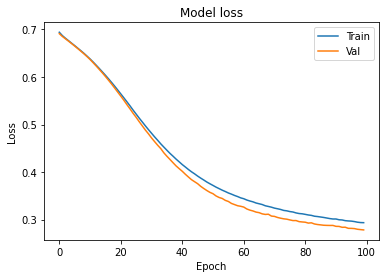

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

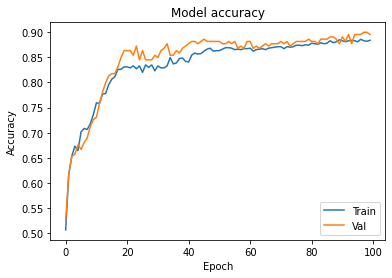

In [51]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [17]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [18]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 50ms/step - loss: 0.5603 - accuracy: 0.6797 - val_loss: 0.3772 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 1s 37ms/step - loss: 0.3749 - accuracy: 0.8484 - val_loss: 0.3096 - val_accuracy: 0.8950
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3326 - accuracy: 0.8730 - val_loss: 0.3030 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2797 - accuracy: 0.8910 - val_loss: 0.3575 - val_accuracy: 0.8174
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2908 - accuracy: 0.8775 - val_loss: 0.2547 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2440 - accuracy: 0.8990 - val_loss: 0.3052 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2638 - accuracy: 0.8880 - val_loss: 0.2457 - val_accuracy: 0.8858
Epoch 

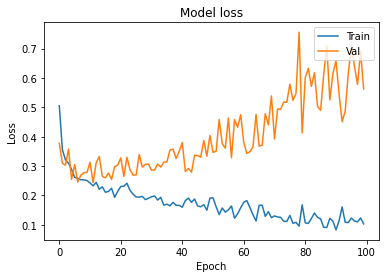

In [19]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

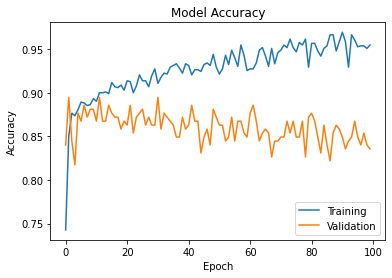

In [52]:

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

In [32]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [33]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 62ms/step - loss: 21.1244 - accuracy: 0.5871 - val_loss: 3.8960 - val_accuracy: 0.7489
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 2.4921 - accuracy: 0.8220 - val_loss: 0.6672 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 2s 48ms/step - loss: 0.6079 - accuracy: 0.8737 - val_loss: 0.4862 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5006 - accuracy: 0.8750 - val_loss: 0.5267 - val_accuracy: 0.8311
Epoch 5/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5118 - accuracy: 0.8471 - val_loss: 0.5719 - val_accuracy: 0.8219
Epoch 6/100
32/32 [==============================] - 2s 48ms/step - loss: 0.4840 - accuracy: 0.8775 - val_loss: 0.4644 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4949 - accuracy: 0.8782 - val_loss: 0.4565 - val_accuracy: 0.8721
Epoch

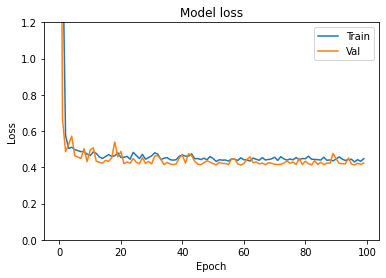

In [34]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

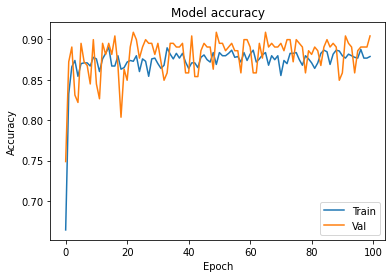

In [53]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()